# **Eksplorasi	Hyperparameter	CNN dan	Neural	Network.**

Tugas	 bersifat	individual.	Pada	 tugas	ini	 anda	 diminta	 untuk	melakukan	 ekplorasi CNN	 dan	 Neural	 Network	 untuk	 persoanalan	 klasifikasi	 dan	 regresi.	 Untuk	 eksplorasi	 ini	 guanakan	 contoh	 program	 digit	 recognition sebagai	 kode	 program	 dasar	 untuk	 eksplorasi.	 	 Gunakan	 datasets	 yang	 sudah	 disediakan	 oleh	 module	
tf.keras.datasets (https://keras.io/api/datasets/). Kinerja model ditentukan dengan  menggunakan test datasets.

# Persoalan Klasifikasi 
Gunakan model CNN untuk persoalan klasifikasi. Datasets yang digunakan 
dapat dipilih salah satu dari datasets CIFAR10, CIFAR100 atau Fashion MNIST. 
Untuk model CNN, lakukan eksploarsi untuk menjawab pertanyaaan-pertanyaan 
sebagai berikut:
1. Berapa banyaknya convolution layar yang optimal?
2. Berapa ukuran filter yang optimal untuk setiap convolution layar?
3. Berapa banyaknya filter yang optimal untuk setiap convolution layar?
4. Berapa banyaknya hidden unit yang optimal pada bagian fully connected 
network?

Untuk mengetahui nilai yang paling optimal, harus dilakukan percobaan dengan
membuat variasi nilai dari hypermarater yang sedang dieksplorasi dengan nilai 
hyperparameter lainnya dibuat tetap (fixed). Jika ada nilai hyperparameter 
lainnya yang sudah ditemukan pada eksplorasi sebelumnya, gunakan nilai 
hyperparameter optimal tsb pada eksplorasi berikutnya Nilai optimal diambil dari  percobaan yang menghasilkan kinerja terbaik. 

Selain itu, lakukan eksplorasi untuk menjawab pertanyaan berikut:
1. Dari semua pilihan yang disedikan oleh Keras Optimizer, mana yang 
menghasilkan kinerja paling baik (pada nilai parameter default) ?
2. Dari Keras Optimizer yang optimal (pada nilai parameter defaul), lakukan 
eksplorasi lebih lanjut apakah ada learning rate schedule yang menghasilkan 
kinerja yang lebih baik lagi.
3. Dari semua pilihan yang disedaikan oleh Keras (Probabilistic) Losses, mana 
yang menghasilkan kinerja paling baik?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Dataset CIFAR10

In [ ]:
# Downloading CIFAR-10
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

# Extracting CIFAR-10
!tar -xvf /content/cifar-10-python.tar.gz

--2022-03-28 03:45:39--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  13.4MB/s    in 14s     

2022-03-28 03:45:54 (12.0 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import os
import numpy as np
#import cPickle
import pickle as cPickle
import pandas as pd 
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import backend as K
from keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.layers import BatchNormalization

# Data processing dan Pembagian dateset ke (Data Training =32.000, Data Validasi=8.000, dan Data Uji = 10.000)

In [ ]:
class Cifar(object):
    def __init__(self, input_path, dropout_index):
        self.input_path = input_path
        self.dropout_index = dropout_index
        self._get_data()
    
    @staticmethod
    def _unpickle(file):
        with open(file, 'rb') as fo:
            dict = cPickle.load(fo, encoding='latin1')
        return dict
    
    @staticmethod
    def _getfiles(path):
        files = []
        for file in os.listdir(path):
            if "data_batch" in file:
                files.append(file)
        return files
 
    def _get_data(self):

        cifar_9_data = []
        cifar_9_labels = []
        cifar_1_data = []
        cifar_1_labels = []
        cifar_data_all = []
        cifar_lebels_all = []
        files = self._getfiles(self.input_path)

        for batch_file in files:
            batch = self._unpickle('{0}/{1}'.format(PATH, batch_file))
            labels = np.array(batch['labels'])
            keep_indexs = np.zeros(len(labels), dtype=bool)
            keep_indexs[labels!=self.dropout_index] = True
            cifar_9_data.append(batch['data'][keep_indexs])
            cifar_9_labels.append(labels[keep_indexs])
            drop_indexs = np.invert(keep_indexs)
            cifar_1_data.append(batch['data'][drop_indexs])
            cifar_1_labels.append(labels[drop_indexs])
            cifar_data_all.append(batch['data'])
            cifar_lebels_all.append(labels)

        cifar_9_data = np.transpose(np.concatenate(cifar_9_data).reshape(-1,3,32,32), (0, 2, 3, 1))
        cifar_9_labels = np.concatenate(cifar_9_labels)
        cifar_1_data = np.transpose(np.concatenate(cifar_1_data).reshape(-1,3,32,32), (0, 2, 3, 1))
        cifar_1_labels = np.concatenate(cifar_1_labels)
        cifar_data_all = np.transpose(np.concatenate(cifar_data_all).reshape(-1,3,32,32), (0, 2, 3, 1))
        cifar_lebels_all = np.concatenate(cifar_lebels_all)
        
#         self.data = cifar_9_data.astype('float32')/255
#         self.labels = tensorflow.keras.utils.to_categorical(cifar_9_labels, 10)
        self.data = cifar_data_all.astype('float32')/255
        self.labels = tensorflow.keras.utils.to_categorical(cifar_lebels_all, 10)  
#         mean = np.mean(cifar_data_all,axis=(0, 2, 3, 1))
#         std = np.std(cifar_data_all,axis=(0, 2, 3, 1))
#         self.data = (cifar_data_all-mean)/(std+1e-7)   
#         self.trans_data = cifar_1_data.astype('float32')/255
#         self.trans_labels = tensorflow.keras.utils.to_categorical(cifar_1_labels, 10)
        
    def next_data_batch(self, num):
        idx = np.arange(0, len(self.labels))
        np.random.shuffle(idx)
        idx = idx[:num]
        
        return self.data[idx], self.labels[idx]
        
    def next_trans_data_batch(self, num):
        idx = np.arange(0, len(self.trans_labels))
        np.random.shuffle(idx)
        idx = idx[:num]
        batch = self.data[idx]
        
        return self.trans_data[idx], self.trans_labels[idx]

# Menampilkan input Citra yang akan digunakan

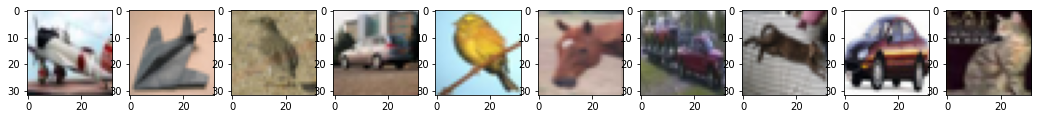

In [ ]:
PATH = "/content/cifar-10-batches-py"
cifar = Cifar(PATH, 9)
data,labels = cifar.next_data_batch(10)
plt.figure(figsize=(18, 10))
#plt.figure()
reference = data
for i in range(reference.shape[0]):
    plt.subplot(int(reference.shape[0]/10)+1, 10, i+1)
    plt.imshow(reference[i])
    
plt.show()

In [ ]:
labels

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
data.shape

(10, 32, 32, 3)

In [ ]:
num_classes = 10
epochs = 100 
weight_decay = 1e-4
x_train = cifar.data[:32000]
y_train = cifar.labels[:32000]
x_val = cifar.data[32000:40000]
y_val = cifar.labels[32000:40000]
x_test = cifar.data[40000:]
y_test = cifar.labels[40000:]

# Learning Rate Scheduler

In [ ]:
#LR Scheduler default
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005       
    return lrate

# #LR Scheduler seeting 1
# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 35:
#         lrate = 0.0006
#     elif epoch > 70:
#         lrate = 0.0004        
#     return lrate

# LR Scheduler seeting 2
# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 35:
#         lrate = 0.0004
#     elif epoch > 70:
#         lrate = 0.0002        
#     return lrate

#LR Scheduler seeting 3
# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 50:
#         lrate = 0.0002
#     elif epoch > 80:
#         lrate = 0.0001        
#     return lrate

# Arsitektur CNN
Proses mendapatkan model CNN yang optimal dimulai dengan menetapkan arsitektur dan nilai hyperparameter awal yang akan digunakan. Aristektur awal yang digunakan memanfaatkan 4 layer CNN, Satu Flatten Layer dan Output layer. Setiap layer CNN yang digunakan terdiri dari beberapa operasi sebagai berikut: fungsi aktivasi Elu, Batch Normalization, Maxpooling, dan Dropout. Ilustrasi aristektur awal yang digunakan ditunjukkan pada Gambar Diatas.

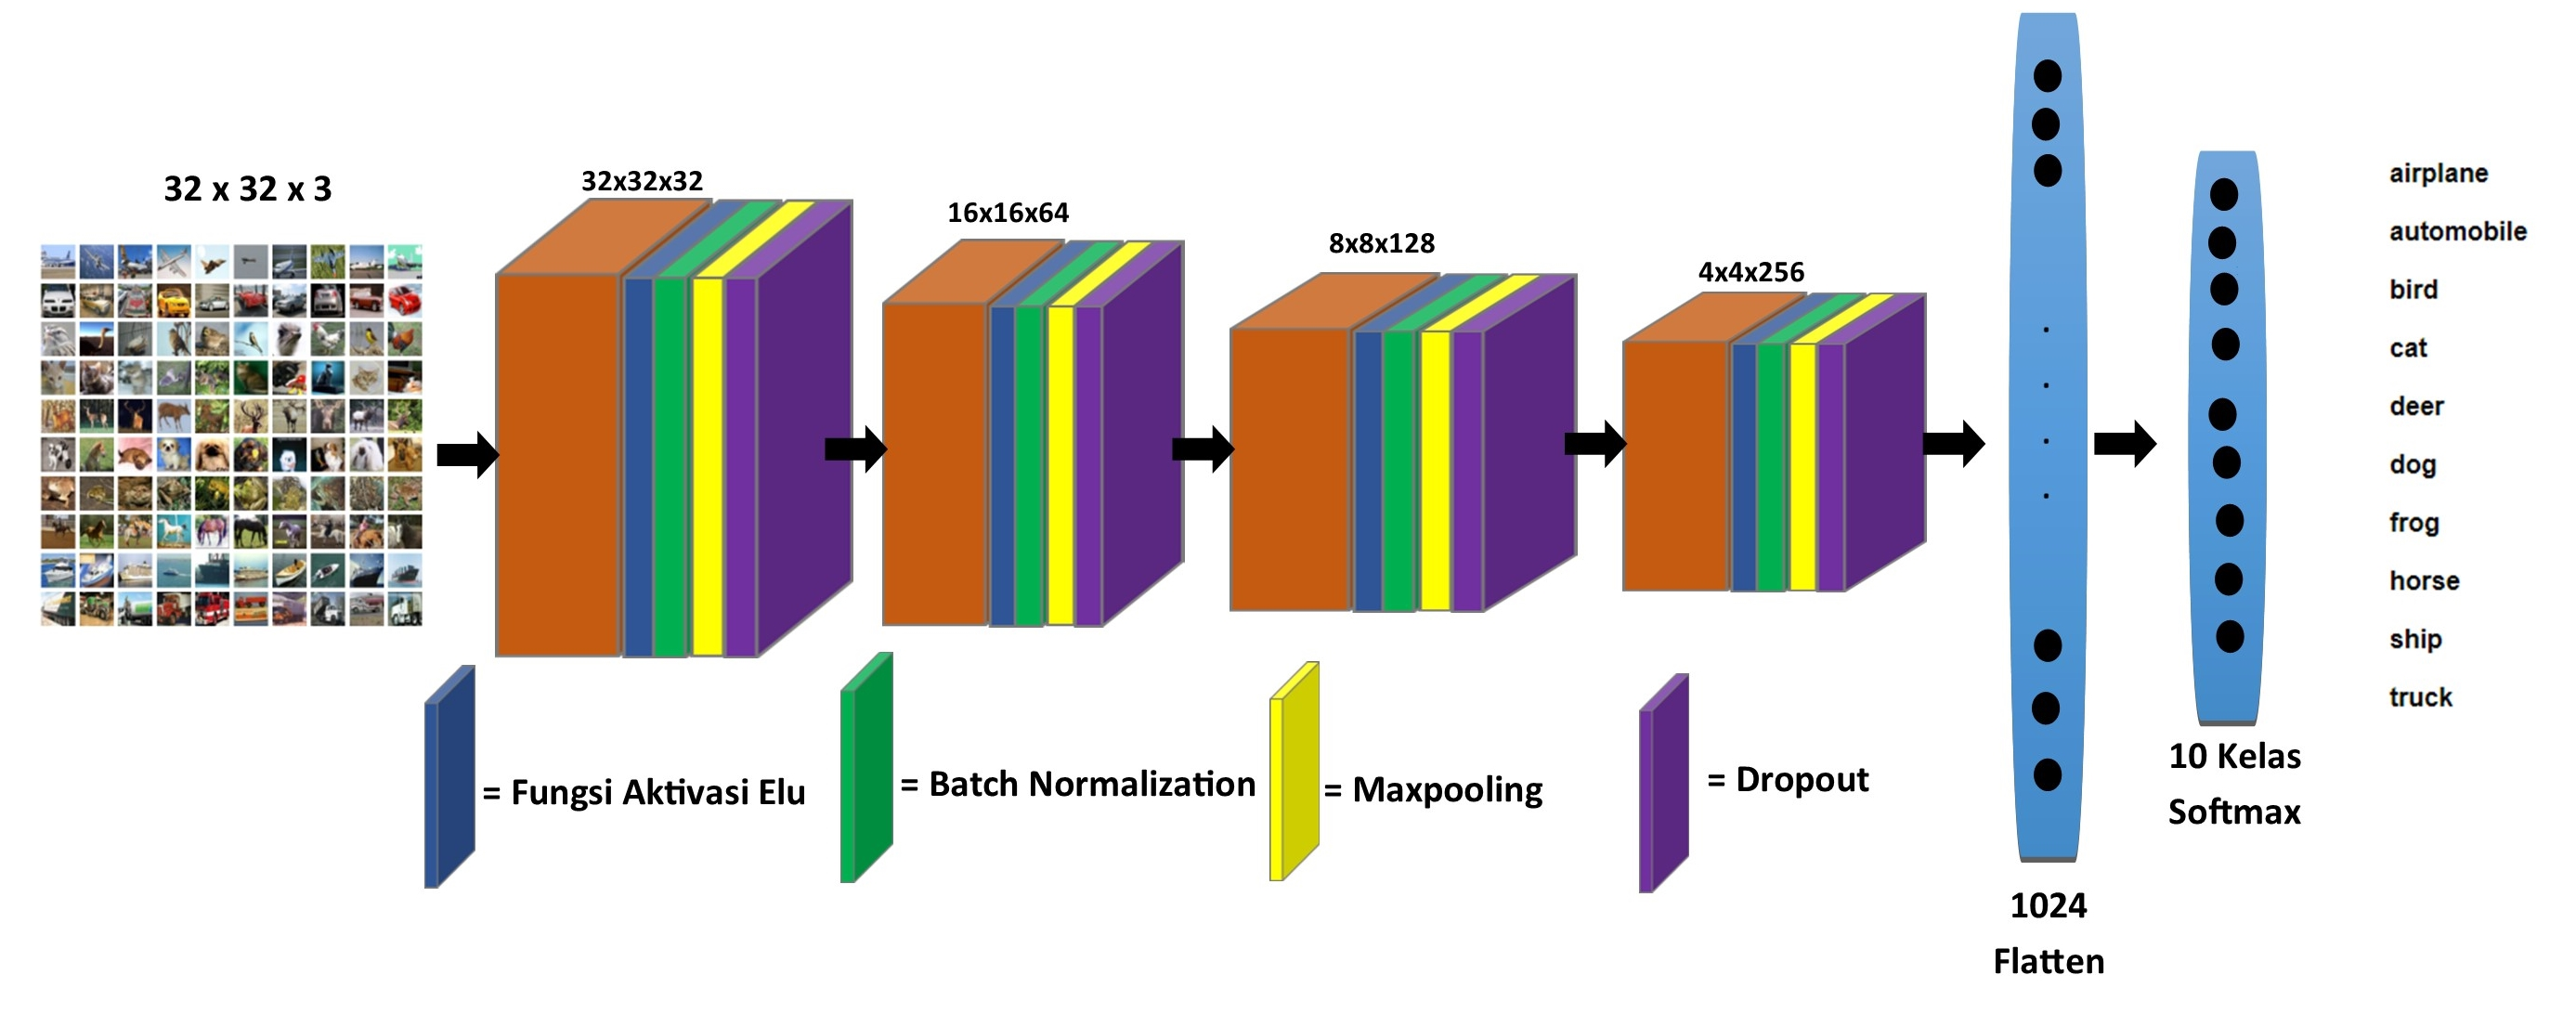


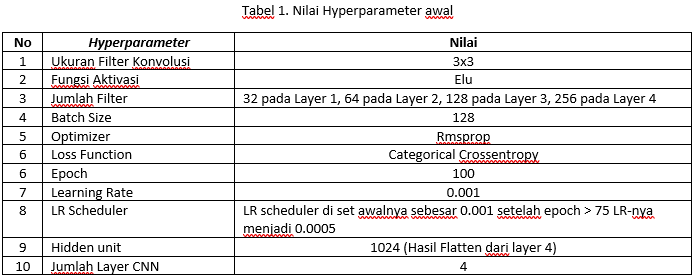

# Model 1 (4 Layer CNN)

In [ ]:
model_1 = Sequential()

#Layer 1
model_1.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(Activation('elu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.2))

#Layer 2
model_1.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(Activation('elu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.3))

#Layer 3
model_1.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(Activation('elu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.4))

#Layer 4
model_1.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(Activation('elu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))

#Full Connected Layer
model_1.add(Flatten())
model_1.add(Dense(num_classes, activation='softmax'))


# Model 2 (8 Layer CNN)

In [ ]:
model_2 = Sequential()

#Layer 1
model_2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(1,1)))
model_2.add(Dropout(0.2))

#Layer 2
model_2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

#Layer 3
model_2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(1,1)))
model_2.add(Dropout(0.3))

#Layer 4
model_2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.3))

#Layer 5
model_2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(1,1)))
model_2.add(Dropout(0.4))

#Layer 6
model_2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))

#Layer 7
model_2.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(1,1)))
model_2.add(Dropout(0.5))

#Layer 8
model_2.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(Activation('elu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))

#Full Connected Layer
model_2.add(Flatten())
model_2.add(Dense(num_classes, activation='softmax'))

# Model 3 (16 Layer CNN)

Karena model 16 layer CNN ini memiliki kinerja yang optimal untuk itu dicoba mengganti ukuran filter disetiap layernya

In [ ]:
model_3 = Sequential()

#Layer 1
# model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(32, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 2
# model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(32, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 3
# model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(32, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 4
# model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(32, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(32, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

#Layer 5
# model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(64, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 6
# model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(64, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 7
# model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(64, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 8
# model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(64, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(64, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

#Layer 9
# model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(128, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 10
# model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(128, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 11
# model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(128, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 12
# model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(128, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(128, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.4))

#Layer 13
# model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(256, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 14
# model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(256, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 15
# model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(256, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 16
# model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))) 
# model_3.add(Conv2D(256, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model_3.add(Conv2D(256, (7,7), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Conv2D(256, (9,9), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

#Full Connected Layer
model_3.add(Flatten())
model_3.add(Dense(num_classes, activation='softmax'))

# Model 4 (32 Layer CNN)

In [ ]:
model_4 = Sequential()

#Layer 1
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 2
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 3
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 4
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 5
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 6
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 7
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.2))

#Layer 8
model_4.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

#Layer 9
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 10
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 11
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 12
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 13
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 14
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.3))

#Layer 15
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 16
model_4.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))

#Layer 17
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 18
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 19
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 20
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 21
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 22
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 23
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.4))

#Layer 24
model_4.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.4))

#Layer 25
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 26
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 27
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 28
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 29
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 30
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 31
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(1,1)))
model_4.add(Dropout(0.5))

#Layer 32
model_4.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(Activation('elu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.5))

#Fully Connected LAyer
model_4.add(Flatten())
model_4.add(Dense(num_classes, activation='softmax'))

# Model 3 dengan filter yang berbeda = 32, 64, 128,256

In [ ]:
jum_filter = 32
# jum_filter = 64
# jum_filter = 128
# jum_filter = 256

model_3 = Sequential()

#Layer 1
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 2
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 3
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 4
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

#Layer 5
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 6
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 7
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 8
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

#Layer 3
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 10
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 11
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 12
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.4))

#Layer 13
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 14
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 15
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 16
model_3.add(Conv2D(jum_filter, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

#Full Connected Layer
model_3.add(Flatten())
model_3.add(Dense(num_classes, activation='softmax'))

# Model 3 dengan  Fully Connected layer

Pada aristektur awal yang digunakan, fully connected layernya didapatkan dari hasil flatten ouput CNN pada layer terakhir sehingga jumlah hidden unit sangat bergantung pada ukuran output layer CNN terakhir. Oleh karena itu, untuk mengetahui berapa jumlah hidden unit yang optimal ditambahkan 1 layer FC diantara Flatten dan output layer, seperti ditunjukkan pada Gambar dibawah

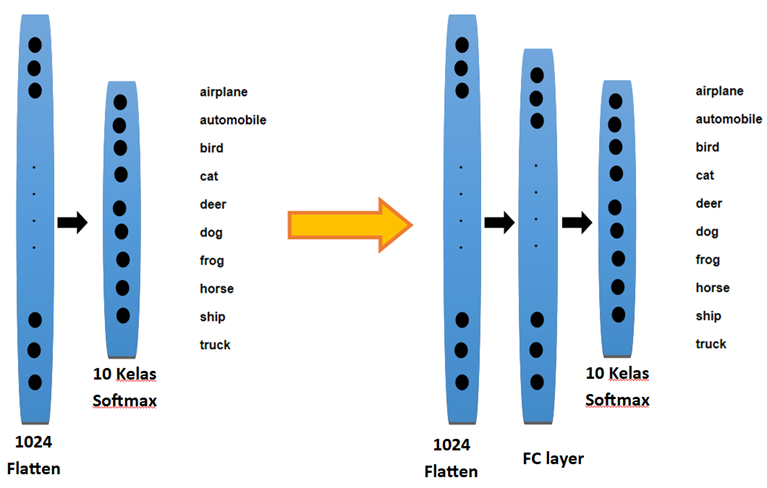

In [ ]:
model_3 = Sequential()

#Layer 1
model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 2
model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 3
model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.2))

#Layer 4
model_3.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))

#Layer 5
model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 6
model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 7
model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.3))

#Layer 8
model_3.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

#Layer 9
model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 10
model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 11
model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.4))

#Layer 12
model_3.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.4))

#Layer 13
model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 14
model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 15
model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(1,1)))
model_3.add(Dropout(0.5))

#Layer 16
model_3.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay))) 
model_3.add(Activation('elu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

#Full Connected Layer
model_3.add(Flatten())
# model_3.add(Dense(64))
# model_3.add(Dense(128))
# model_3.add(Dense(256))
model_3.add(Dense(512))
model_3.add(Activation('elu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(num_classes, activation='softmax'))

# Dari hasil  percobaan diatas dengan  menjawab empat pertanyaan awal didapatkan Arsitektur akhir sebagai berikut

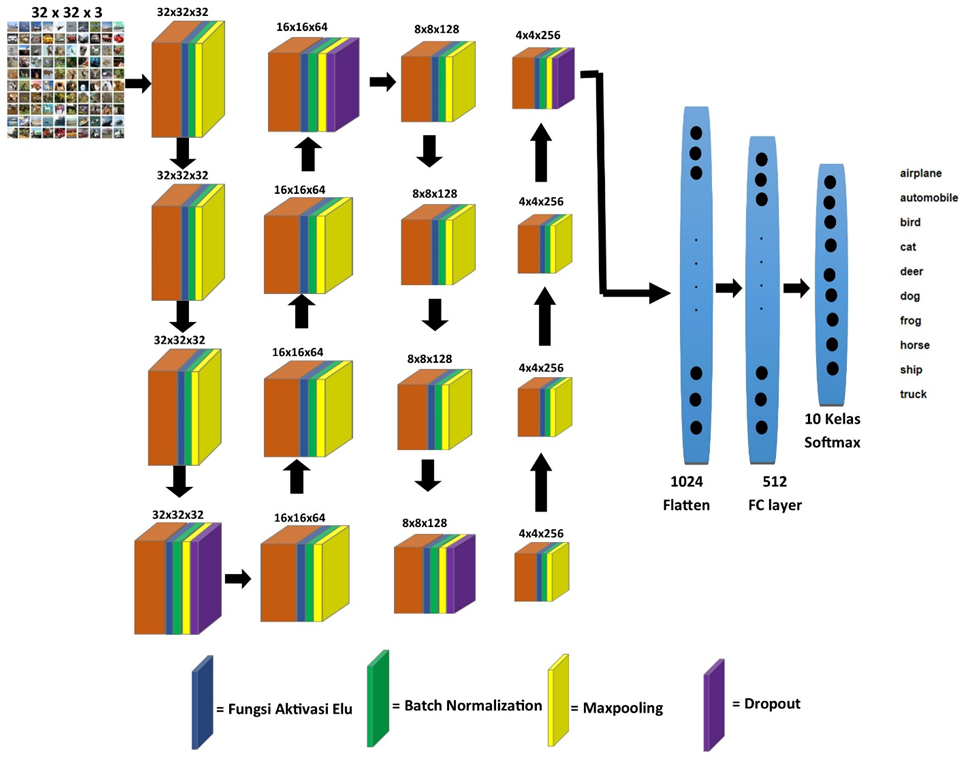

# Model Summary

In [ ]:
input_shape = x_train.shape  
model_3.build(input_shape)
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (32000, 32, 32, 32)      896       
 er)                                                             
                                                                 
 activation (Activation)     (32000, 32, 32, 32)       0         
                                                                 
 batch_normalization (BatchN  (32000, 32, 32, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32000, 32, 32, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (32000, 32, 32, 32)       0         
                                                        

# Augmentasi Data

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

# Proses Training

In [ ]:
batch_size = 128

# opt_rms = tensorflow.keras.optimizers.RMSprop(lr=0.001)
# opt_SGD = tensorflow.keras.optimizers.SGD(lr=0.001)
opt_Adam = tensorflow.keras.optimizers.Adam(lr=0.001)
# opt_Adamax = tensorflow.keras.optimizers.Adamax(lr=0.001)
# opt_Adagrad = tensorflow.keras.optimizers.Adagrad(lr=0.001)
# opt_Adadelta = tensorflow.keras.optimizers.Adadelta(lr=0.001)
# opt_Nadam = tensorflow.keras.optimizers.Nadam(lr=0.001)
# opt_Ftrl = tensorflow.keras.optimizers.Ftrl(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_3.compile(loss='kl_divergence', optimizer=opt_Adam, metrics=['accuracy'])
history = model_3.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=2,validation_data=(x_val,y_val), callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


250/250 - 28s - loss: 2.4701 - accuracy: 0.2079 - val_loss: 4.3540 - val_accuracy: 0.1717 - lr: 0.0010 - 28s/epoch - 112ms/step
Epoch 2/100
250/250 - 14s - loss: 1.8049 - accuracy: 0.3318 - val_loss: 2.3668 - val_accuracy: 0.3171 - lr: 0.0010 - 14s/epoch - 57ms/step
Epoch 3/100
250/250 - 14s - loss: 1.5993 - accuracy: 0.4111 - val_loss: 1.9199 - val_accuracy: 0.4502 - lr: 0.0010 - 14s/epoch - 57ms/step
Epoch 4/100
250/250 - 14s - loss: 1.4437 - accuracy: 0.4741 - val_loss: 1.8117 - val_accuracy: 0.4940 - lr: 0.0010 - 14s/epoch - 57ms/step
Epoch 5/100
250/250 - 14s - loss: 1.3453 - accuracy: 0.5164 - val_loss: 1.3027 - val_accuracy: 0.5792 - lr: 0.0010 - 14s/epoch - 57ms/step
Epoch 6/100
250/250 - 14s - loss: 1.2746 - accuracy: 0.5430 - val_loss: 1.4656 - val_accuracy: 0.5534 - lr: 0.0010 - 14s/epoch - 58ms/step
Epoch 7/100
250/250 - 14s - loss: 1.2032 - accuracy: 0.5763 - val_loss: 1.3644 - val_accuracy: 0.5863 - lr: 0.0010 - 14s/epoch - 58ms/step
Epoch 8/100
250/250 - 14s - loss: 1.14

In [ ]:
model_3.save('/content/drive/MyDrive/Tugas Hyperparamater CNN dan Neural Network/model_3 dengan KL_divergence') 

# import os.path
# if os.path.isfile('/content/drive/MyDrive/Tugas Hyperparamater CNN dan Neural Network/seq1.h5') is False:
#   model.save('/content/drive/MyDrive/Tugas Hyperparamater CNN dan Neural Network/seq1.h5')

# load Model yang disimpan

In [ ]:
import tensorflow as tf

new_model = tf.keras.models.load_model('/content/drive/MyDrive/Tugas Hyperparamater CNN dan Neural Network/model_3 dengan KL_divergence')

In [ ]:
new_model.summary()

# Plot Hasil Training

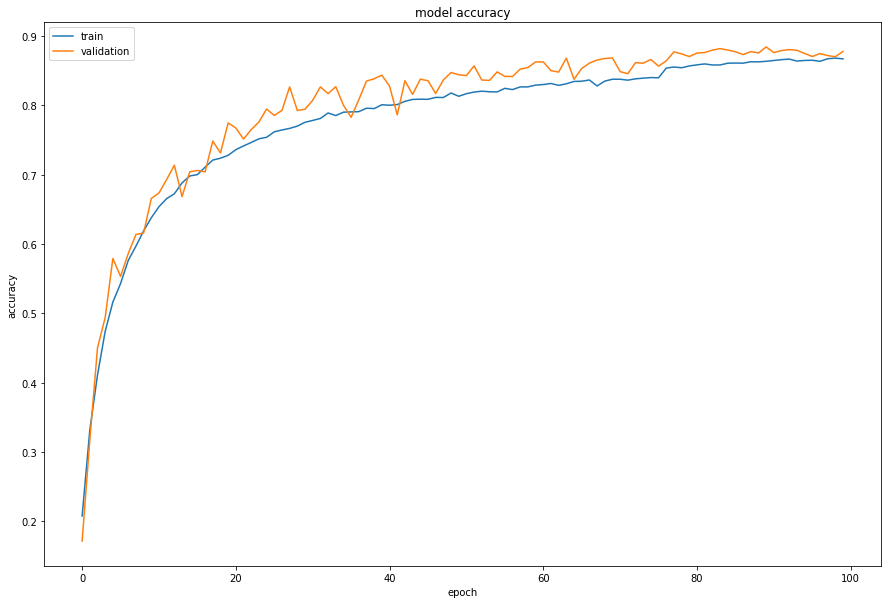

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

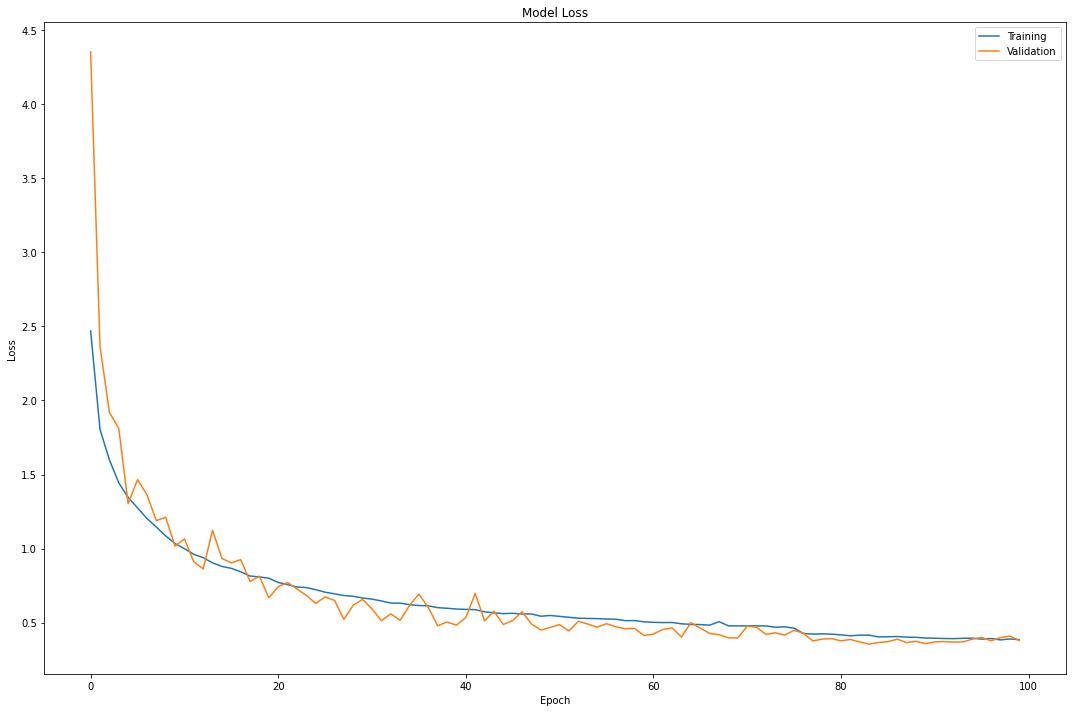

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.ylim(0, 5)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [ ]:
# Label Names(not gaven as metadata)
Label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
    ]
y_pred = np.argmax(model_3.predict(x_test), axis=1)   
y_label = np.argmax(y_test,axis=1)

# Evaluasi Test set

In [19]:
scores = model_3.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 14ms/step - loss: 0.3985 - accuracy: 0.8725

Test result: 87.250 loss: 0.399


# Confusion Matrix

In [20]:
def print_confusion_matrix(confusion_matrix, class_names, 
                           figsize = (15,10), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

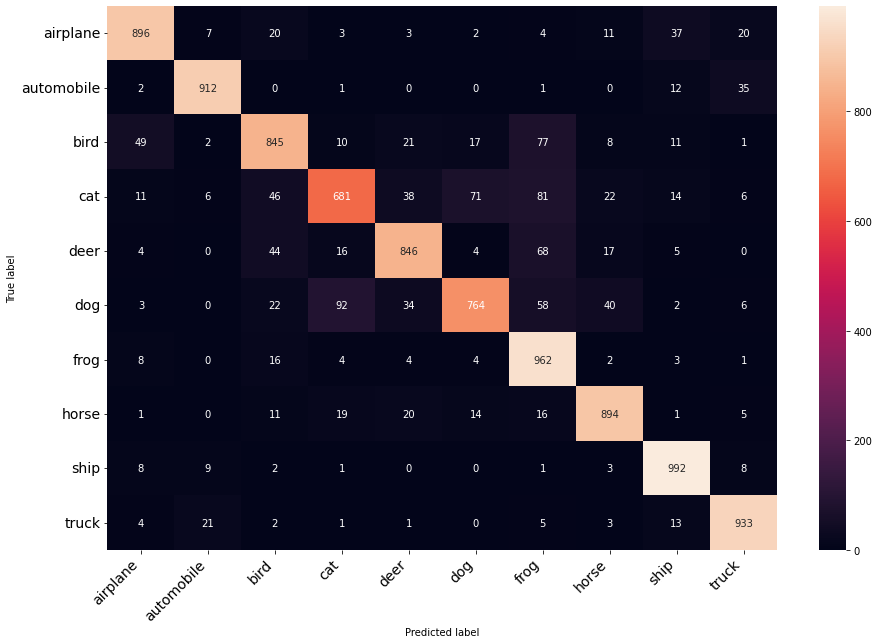

In [21]:
#  Cifar-9 Confusion Matrix
print_confusion_matrix(confusion_matrix(y_label, y_pred), 
                       Label_names)

# Generate output sample

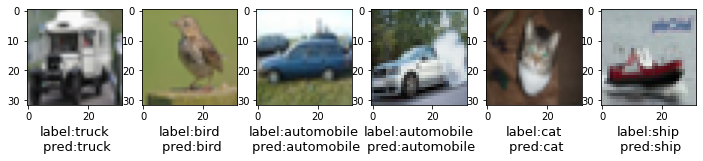

In [22]:
def random_examples(image, label, predict, Label_names, sample_size=6):
    plt.figure(figsize=(12, 10))
    reference = image[:sample_size]
    for i in range(reference.shape[0]):
        plt.subplot(int(reference.shape[0]/sample_size)+1, 
                    sample_size, i+1)
        plt.imshow(reference[i])
        plt.xlabel('label:{0}\n pred:{1}'.format(Label_names[label[i]],
                                                 Label_names[pred[i]]), 
                   fontsize=13)
    plt.show()
image,label = cifar.next_data_batch(6)
label = np.argmax(label, axis=1)
pred = np.argmax(model_3.predict(image), axis=1)
random_examples(image, label, pred, Label_names)